# **미니프로젝트 4차 1대1 문의 내용 유형 분류기**
# 단계1 : 데이터 탐색

### 문제 정의
> 1:1 문의 내용 분류 문제<br>
> 1. 문의 내용 분석
> 2. 문의 내용 분류 모델 성능 평가
### 학습 데이터
> * 1:1 문의 내용 데이터 : train.csv

### 변수 소개
> * text : 문의 내용
> * label : 문의 유형

### References
> * 한국어 처리
>> * [konlpy - 한국어 처리 라이브러리](https://konlpy.org/ko/latest/)
>> * [한국어 품사 태그 비교표](https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0)
>> * [한국어 품사 태깅 성능 비교](https://konlpy.org/ko/latest/morph/#comparison-between-pos-tagging-classes)
>> * [한국어 시스템 사전](https://konlpy.org/ko/latest/data/#corpora)

> * 자연어 처리
>> * [NLTK](https://www.nltk.org/book/)
>> * [gensim](https://radimrehurek.com/gensim/)
>> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-2)
>> * [WordCloud](https://amueller.github.io/word_cloud/)

## 1. 개발 환경 설정

* 세부 요구사항
  - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
  - 필요하다고 판단되는 라이브러리를 추가하세요.
  - konlpy, mecab 설치 후 형태소 분석 함수 생성
  - mecab 설치할 때 윈도우 pc에서 설치는 다른 방법으로 진행
  - 윈도우 환경일 경우 KoNLPy의 라이브러리 설치가 제대로 이루어지지 않을 수 있습니다
  - 윈도우 설치를 위한 참고 링크
    - https://liveyourit.tistory.com/56

### 1-1. 라이브러리 설치

In [1]:
# 필요 라이브러리부터 설치할께요.
!pip install konlpy pandas seaborn gensim wordcloud python-mecab-ko wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.6/575.6 KB 20.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 8.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=4c374481c58c9e18162c13e6da130e5a8e63430f4d4d59c0af1470e626ca3e2e
  Stored in directory: /root/.cache/pip/wheels/04/5f/3e/46cc37c5d698415694d83f607f833f83f0149e49b3af9d0f38
Successfully built wget


### 1-2. 라이브러리 import

In [2]:
from mecab import MeCab
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud
from collections import Counter
import wget, os

### 1-3. 한글 글꼴 설정(Windows)

In [3]:
if not os.path.exists("malgun.ttf"): 
    wget.download("https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf")
if 'malgun' not in fm.fontManager.findfont("Malgun Gothic"):
    fm.fontManager.addfont("malgun.ttf")
if plt.rcParams['font.family']!= ["Malgun Gothic"]:
    plt.rcParams['font.family']= [font for font in fm.fontManager.ttflist if 'malgun.ttf' in font.fname][-1].name
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
assert plt.rcParams['font.family'] == ["Malgun Gothic"], "한글 폰트가 설정되지 않았습니다."
FONT_PATH = "malgun.ttf"

### 1-4. 자바 경로 설정(Windows)

In [4]:
#os.environ['JAVA_HOME'] = "C:\Program Files\Java\jdk-19"

### 1-3. 한글 글꼴 설정(Colab)

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 3s (3,185 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [6]:
FONT_PATH = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=FONT_PATH, size=10).get_name()
print(font_name)
plt.rcParams['font.family']=font_name
assert plt.rcParams['font.family'] == [font_name], "한글 폰트가 설정되지 않았습니다."

NanumGothic


### 1-4. 구글드라이브 연결(Colab)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2.데이터 불러오기

* 주어진 데이터
 - 학습 및 검증용 데이터 : train.csv

### 2-1. 데이터 로딩

* 다음 데이터를 불러옵니다.
    * 학습 및 검증용 데이터 : train.csv
    * shape를 확인합니다.

In [8]:
PATH = '/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4'

df_train = pd.read_csv(os.path.join(PATH, 'train.csv'))


### 2-2. 데이터 확인하기
* 문의 유형 분포 확인
* data type, 결측치 확인

In [9]:
df_train.shape

(3706, 2)

In [10]:
df_train.info

<bound method DataFrame.info of                                                    text   label
0     self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...     코드2
1     현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...       웹
2     glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...     코드2
3     tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...     코드2
4     filename = TEST_IMAGE + str(round(frame_sec)) ...     코드2
...                                                 ...     ...
3701  토큰화 이후 train val 를 분리하고 각 train set, val set에 ...     코드2
3702  올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...  시스템 운영
3703  수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...      이론
3704  inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...      원격
3705  상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...      이론

[3706 rows x 2 columns]>

<bound method NDFrame.head of                                                    text   label
0     self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...     코드2
1     현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...       웹
2     glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...     코드2
3     tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...     코드2
4     filename = TEST_IMAGE + str(round(frame_sec)) ...     코드2
...                                                 ...     ...
3701  토큰화 이후 train val 를 분리하고 각 train set, val set에 ...     코드2
3702  올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...  시스템 운영
3703  수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...      이론
3704  inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...      원격
3705  상관관계는 그렇게 크지 않게 나오는데 p -value 값은 관련이 있게 나오는데 \...      이론

[3706 rows x 2 columns]>

코드2       1097
웹          732
이론         728
시스템 운영     561
코드1        488
원격         100
Name: label, dtype: int64

----------------------------------------------------------------------------------------------------


코드2       0.296006
웹         0.197518
이론        0.196438
시스템 운영    0.151376
코드1       0.131678
원격        0.026983
Name: label, dtype: float64

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53076 (\N{HANGUL SYLLABLE KO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46300 (\N{HANGUL SYLLABLE DEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50937 (\N{HANGUL SYLLABLE WEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47200 (\N{HANGUL SYLLABLE RON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/c

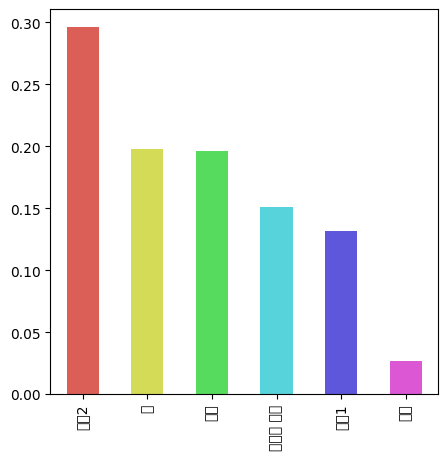

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   object
dtypes: object(2)
memory usage: 58.0+ KB


,text,label
count,3706,3706
unique,3706,6
top,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",코드2
freq,1,1097


In [11]:
display(df_train.head)
display(df_train.label.value_counts())
print("-"*100)
norm_label = df_train.label.value_counts(normalize=True)
display(norm_label)
norm_label.plot.bar(figsize=(5,5), color=sns.color_palette('hls', n_colors=len(norm_label)))
plt.show()
df_train.info()
display(df_train.describe(include='all'))

## 3.데이터 탐색하기


### 3-1. 문의 내용 길이 분포

* 문의 내용의 길이 분포를 확인합니다.
* 최소, 최대 길이의 index 및 문의 내용을 확인합니다.

----------------------------------------------------------------------------------------------------
최대 길이:  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs)
   1768           

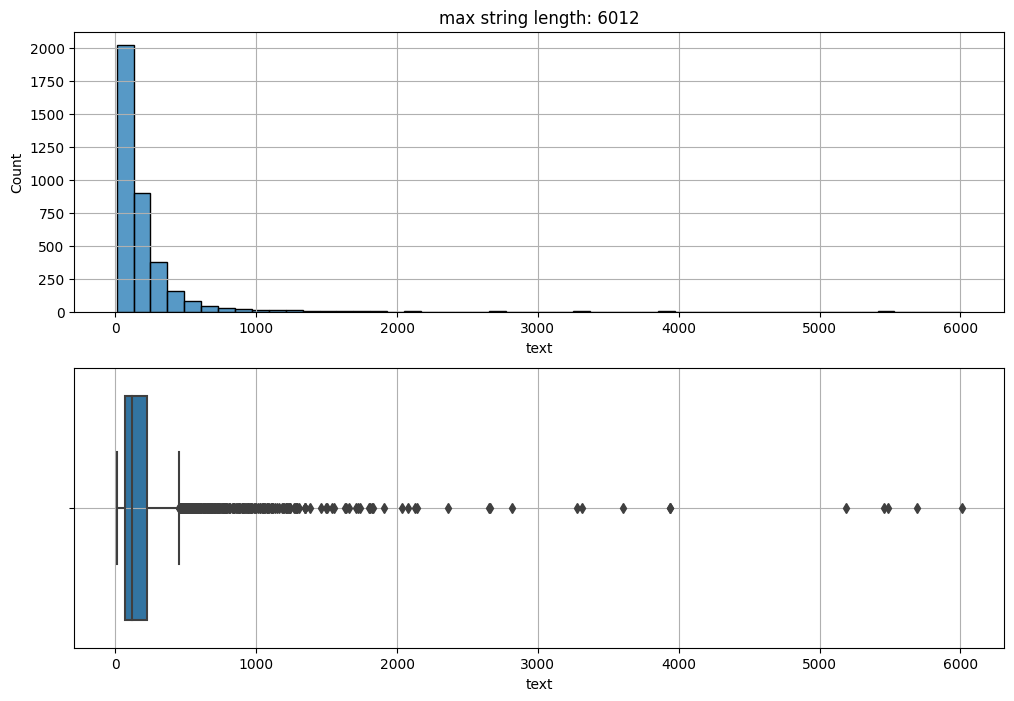

In [12]:
print("-"*100)
text_length = df_train.text.str.len()
print("최대 길이: ", df_train.text[text_length.argmax()], text_length.argmax())
print("최소 길이: ", df_train.text[text_length.argmin()], text_length.argmin())
plt.figure(figsize=(12,8))
plt.subplot(2,1,1, title="max string length: " +str(max(text_length)))
sns.histplot(text_length, bins=50)
plt.grid()

plt.subplot(2,1,2)
sns.boxplot(x=text_length)
plt.grid()
plt.show()

### 3-2. 명사 추출하고 품사 태깅하기

* konlpy, MeCab을 활용하여 품사 태깅, 명사 추출하기.
* 2개 이상의 형태소 분석기를 Time analysis 해보기
* Number of Samples / Number of words per sample 구해보기

In [13]:
import nltk
nltk.download('stopwords')
from konlpy.tag import Okt
from mecab import MeCab
mecab = MeCab()
okt = Okt()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [14]:
if 'okt_morphs' not in globals():
    %time okt_morphs = df_train.text.apply(lambda t:okt.morphs(str(t)))
    %time okt_nouns = df_train.text.apply(lambda t:okt.nouns(str(t)))
    %time okt_pos = df_train.text.apply(lambda t:okt.pos(str(t), norm=True, stem=True, join=True))

CPU times: user 47.6 s, sys: 577 ms, total: 48.2 s
Wall time: 40.2 s
CPU times: user 31.6 s, sys: 114 ms, total: 31.7 s
Wall time: 32.8 s
CPU times: user 55 s, sys: 237 ms, total: 55.3 s
Wall time: 52.2 s


In [15]:
def mecab_tokenizer(string):
    return list("/".join(res) for res in mecab.pos(str(string)))

In [16]:
if 'morphs' not in globals():
    %time morphs = df_train.text.apply(lambda t:mecab.morphs(str(t)))
    %time nouns = df_train.text.apply(lambda t:mecab.nouns(str(t)))
    %time pos_tuple = df_train.text.apply(lambda t:mecab.pos(str(t)))
    %time pos = df_train.text.apply(mecab_tokenizer)

CPU times: user 4.57 s, sys: 23.4 ms, total: 4.59 s
Wall time: 4.68 s
CPU times: user 3.75 s, sys: 15.7 ms, total: 3.77 s
Wall time: 3.82 s
CPU times: user 3.61 s, sys: 55 ms, total: 3.67 s
Wall time: 3.67 s
CPU times: user 3.56 s, sys: 38 ms, total: 3.6 s
Wall time: 3.61 s


In [17]:
# Number of Samples / Number of words per sample
len(pos)/pos.apply(len).mean()

46.16679215855003

In [18]:
okt_nouns.dtype

dtype('O')

In [19]:
morphs.dtype

dtype('O')

### 3-3. nltk로 텍스트 분석하기
* 3-2.의 명사 추출, 품사 태깅한 데이터를 nltk Text로 변경하기
* 각각 token 갯수 / 전체 token 비율(Type-Token Ratio) 알아보기
* 각각 Frequency 확인 및 분포 시각화
* 명사 추출한 데이터에서 코드, 웹, 이론, 원격, 시스템 등 관심있는 각 단어에 분석해보기
* 각각 collocation 확인
* 최소 길이 문의 내용에 대해 grammar pasing 해보기(아래 코드 활용)


```python
grammar = """
NP: {<N.*>*<Suffix>?}   # Noun phrase
VP: {<V.*>*}            # Verb phrase
AP: {<A.*>*}            # Adjective phrase
"""
NP_grammar = "NP: {<Adjective>*<Noun>*}"
```

In [20]:
%%time
nltk_nouns = nltk.Text(nouns.explode())
nltk_nouns = nltk.Text([w for w in nltk_nouns if isinstance(w, str)])
nltk_morphs = nltk.Text(morphs.explode())
nltk_morphs = nltk.Text([w for w in nltk_morphs if isinstance(w, str)])
nltk_pos = nltk.Text(pos.explode())
nltk_pos_tuple = nltk.Text(pos_tuple)

CPU times: user 390 ms, sys: 8.98 ms, total: 399 ms
Wall time: 418 ms


In [21]:
nltk_pos_tuple

<Text: [('self', 'SL'), ('.', 'SY'), ('convs', 'SL'), ('1', 'SN'), ('=', 'SY'), ('nn', 'SL'), ('.', 'SY'), ('ModuleList', 'SL'), ('(', 'SSO'), ('[', 'SSO'), ('nn', 'SL'), ('.', 'SY'), ('Conv', 'SL'), ('2', 'SN'), ('d', 'SL'), ('(', 'SSO'), ('1', 'SN'), (',', 'SC'), ('Co', 'SL'), (',', 'SC'), ('(', 'SSO'), ('K', 'SL'), (',', 'SC'), ('100', 'SN'), (')', 'SSC'), (')', 'SSC'), ('for', 'SL'), ('K', 'SL'), ('in', 'SL'), ('Ks', 'SL'), (']', 'SSC'), (')', 'SSC'), ('1', 'SN'), ('.', 'SF'), ('여기', 'NP'), ('서', 'JKB'), ('커널', 'NNG'), ('사이즈', 'NNG'), ('K', 'SL'), (',', 'SC'), ('100', 'SN'), ('은', 'NNG'), ('한', 'MM'), ('단어', 'NNG'), ('의', 'JKG'), ('최대', 'NNG'), ('길이', 'NNG'), ('가', 'JKS'), ('100', 'SN'), ('이', 'JKS'), ('넘', 'VV'), ('지', 'EC'), ('않', 'VX'), ('는다는', 'ETM'), ('가정', 'NNG'), ('으로', 'JKB'), ('그냥', 'MAG'), ('100', 'SN'), ('으로', 'JKB'), ('선언', 'NNG'), ('한', 'XSA+ETM'), ('것', 'NNB'), ('인지', 'VCP+EC'), ('궁금', 'XR'), ('합니다', 'XSA+EF'), ('.', 'SF')] [('현재', 'MAG'), ('이미지', 'NNG'), ('를', 'JKO')

In [22]:
display(nltk_nouns.vocab())
print(len(nltk_nouns.vocab()))

FreqDist({'것': 1093, '수': 986, '값': 801, '데이터': 783, '문제': 725, '때': 714, '코드': 712, '실습': 609, '번': 596, '파일': 581, ...})

3423


In [23]:
display(nltk_pos.vocab())
print(len(nltk_pos.vocab()))

FreqDist({'(/SSO': 6450, ',/SC': 6342, '-/SY': 5845, './SF': 5557, ')/SSC': 5517, '_/SY': 5425, './SY': 5226, '=/SY': 4081, '하/XSV': 3605, '가/JKS': 3373, ...})

11980


In [24]:
display(nltk_morphs.vocab())
print(len(nltk_morphs.vocab()))

FreqDist({'.': 10783, '(': 6452, ',': 6362, '-': 5845, ')': 5668, '_': 5425, '하': 5410, '는': 4475, '이': 4155, '=': 4081, ...})

11066


In [25]:
len(set(nltk_nouns))/len(nltk_nouns)

0.060026304252520826

In [26]:
len(set(nltk_pos))/len(nltk_pos)

0.040269449000994974

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44163 (\N{HANGUL SYLLABLE GEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyt

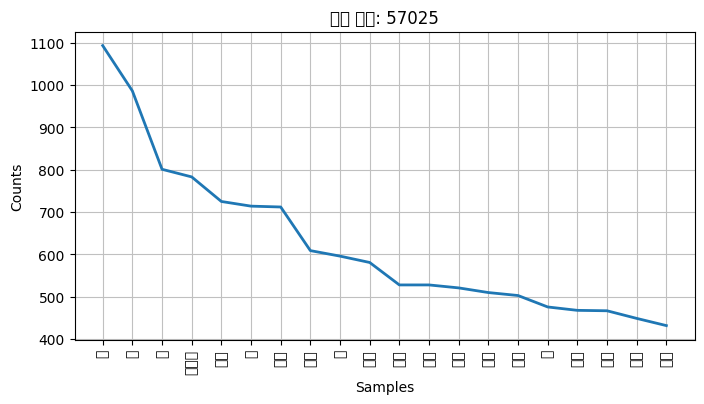

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53468 (\N{HANGUL SYLLABLE TAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44613 (\N{HANGUL SYLLABLE GING}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54616 (\N{HANGUL SYLLABLE HA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython

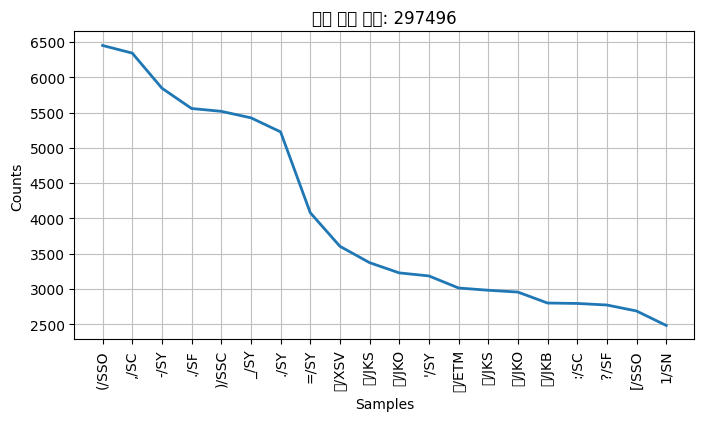

In [27]:
plt.figure(figsize=(8,4))
plt.title("명사 개수: " + str(len(nltk_nouns.tokens)))
nltk_nouns.plot(20)
plt.show()
plt.figure(figsize=(8,4))
plt.title("품사 태깅 개수: " + str(len(nltk_pos.tokens)))
nltk_pos.plot(20)
plt.show()

In [28]:
nltk_nouns.concordance("코드", lines=10)
print("*"*100)
nltk_nouns.similar("코드")

Displaying 10 of 712 matches:
 업로드 자바 스크립트 동적 폼 개 생성 데 클릭 뭘 수 기본 예제 코드 이유 뭘까요 사용 때 질문 포함 작동 것 질문 제공 파일 폴더 포함
석 아래 가설 검증 방향 접근 방법 비 비 생각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 
각 첨부 파일 번 정답 코드 시 패스 출력 문제 요구 건 오답 경우 코드 것 웹 해킹 공부 리 큰따옴표 따옴표 백 슬래시 데이터베이스 전달 
슬라이딩 퍼즐 문제 관련 질문 줄 처 숫자 빈칸 공백 입력 것 이해 코드 작성 초기 퍼즐 상태 이동 상태 저장 이동 상태 이동 횟수 저장 상
리 이동 완료 배열 대응 값 경우 이동한 상태 저장 이동 횟수 다음 코드 작성 예제 입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부
입력 정답 것 확인 채점 결과 테스트 케이스 결과 제 부분 생각 것 코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드
코드 문제 문 감사 강사 참조 자료 아래 강사 거 표 생성 위 자료 코드 참조 작성 에러 위 에러 문구 안녕 선형 회귀 로지스틱 회귀 때 사
 저 정의 오류 부분 지 모델 생성 때 방법 설정 선언 걸까요 에러 코드 어디 건지 수 금요일 홈페이지 점검 내용 금일 접속 곳 접속 코딩 
후 부팅 동일 증상 문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 
감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트 에러 데이터 
****************************************************************************************************
제 것 파일 값 번 실행 실습 문제 방법 문 수 오류 감사 위 발생 부분 에러 모델 함수 사용


In [29]:
nltk_nouns.concordance("탱크", lines=10)
print("*"*100)
nltk_nouns.similar("탱크")

Displaying 5 of 5 matches:
 안녕 스턴스 연결 명령어 사용 것 원격 번 검수 부탁 과제 메로나 탱크 보이 월드콘 과제 요일 입력 토 일 메로나 메로나 탱크 보이 탱크 
과제 메로나 탱크 보이 월드콘 과제 요일 입력 토 일 메로나 메로나 탱크 보이 탱크 보이 월드콘 월드콘 월 화 수 목 금 메로나 메로나 탱크
 탱크 보이 월드콘 과제 요일 입력 토 일 메로나 메로나 탱크 보이 탱크 보이 월드콘 월드콘 월 화 수 목 금 메로나 메로나 탱크 보이 탱크
탱크 보이 탱크 보이 월드콘 월드콘 월 화 수 목 금 메로나 메로나 탱크 보이 탱크 보이 월드콘 월드콘 입력 실습 어문 마지막 문제 전 프로
탱크 보이 월드콘 월드콘 월 화 수 목 금 메로나 메로나 탱크 보이 탱크 보이 월드콘 월드콘 입력 실습 어문 마지막 문제 전 프로그램 요일 
****************************************************************************************************



In [30]:
nltk_nouns.concordance("오류", lines=10)
print("*"*100)
nltk_nouns.similar("오류")

Displaying 10 of 521 matches:
 질문 포함 작동 것 질문 제공 파일 폴더 포함 폴더 안 정상 작동 오류 해결 안 폴더 안 이미지 저장 걸로 이해 실행 폴더 이미지 저장 질
 부분 부분 실행 파일 으로 생략 처음 데이터 열 때 옵션 적용 거 오류 걸까요 중간 원본 변경 걸까요 안녕 코딩 마스터스 에이 블러 코딩 
량 데 도움 진행 것 생각 감사 모델 예측 값 과정 옵티마 저 정의 오류 부분 지 모델 생성 때 방법 설정 선언 걸까요 에러 코드 어디 건지
용 금일 접속 곳 접속 코딩 마스터스 서버 접속 문 말씀 대로 이번 오류 발생 가능 원격 제어 운영 님 원격 문 글 오전 시간 얼마 실습 시
일 증상 문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트
문의 감사 강사 화면 타이핑 강사 채팅 창 입력 코드 북사 오류 값 오류 코드 입니다 문제 번 구군 증가 액 매매 증가 액 식 차트 에러 데
명 수 클라우드 문의 환경 세팅 완료 클라우드 에러 이전 과정 확인 오류 문 기능 헤드 부분 출력 바디 부분 출력 이거 해결 안녕 조 제출 
지 위 경우 그동안 문제 건지 문 전처리 부분 시간 관련 열 모델링 오류 기준일 열 형식 변경 해결 변수 가설 수립 때 변수 간 관계 이용 
수정 수 제출 파일 공백 파일 감사 더미 변수 생성 파트 이상 진행 오류 진행 진행 오류 나 뭐 문제 결과 첨부 마지막 안내 명령어 수행 에
일 공백 파일 감사 더미 변수 생성 파트 이상 진행 오류 진행 진행 오류 나 뭐 문제 결과 첨부 마지막 안내 명령어 수행 에러 메시지 원격 
****************************************************************************************************
에러 문제 것 코드 부분 수 사용 때 아래 시 해당 발생 질문 파일 이해 실행 출력 경우 위 값


In [31]:
nltk_nouns._word_context_index._word_to_contexts["코드"]

FreqDist({('실습', '작성'): 12, ('다음', '작성'): 9, ('위', '실행'): 7, ('아래', '실행'): 5, ('에러', '발생'): 4, ('구', '도착'): 4, ('제', '다음'): 4, ('위', '결과'): 3, ('문제', '작성'): 3, ('방법', '작성'): 3, ...})

In [32]:
nltk_nouns._word_context_index._word_to_contexts["오류"]

FreqDist({('다음', '발생'): 6, ('과정', '발생'): 6, ('실행', '발생'): 4, ('진행', '발생'): 3, ('결과', '발생'): 3, ('클릭', '발생'): 3, ('때', '발생'): 3, ('진행', '진행'): 2, ('오류', '해결'): 2, ('수', '코드'): 2, ...})

In [33]:
nltk_nouns._word_context_index._word_to_contexts["코드"][('위', '실행')]

7

In [34]:
nltk_nouns._word_context_index._word_to_contexts["코드", "오류류"]

FreqDist({})

In [35]:
nltk_morphs.collocations(window_size=5)
print("*"*50)
nltk_nouns.collocations(window_size=5)
print("*"*50)
nltk_pos.collocations(window_size=5)

Programs Python; site packages; Users User; lib site; int input; lib
packages; Users AppData; User AppData; Local Programs; AppData Local;
AppData Programs; User Local; level pnu; Local Python; Python Python;
map int; seoul moving; input split; Python lib; site django
**************************************************
데이터 프레임; 케이스 케이스; 라우팅 테이블; 인구수 인구수; 데이터 데이터; 충청북도 충청남도; 기준일 기준일; 테스트
케이스; 하이퍼 파라미터; 대구분 대구분; 리스트 리스트; 강원도 충청남도; 충청북도 강원도; 데이터 전처리; 문자열 문자열;
가중치 가중치; 주피터 노트북; 수원시 수원시; 홍길동 일지매; 충청남도 강원도
**************************************************
-/SY -/SY; \/SY \/SY; (/SSO )/SSC; //SC //SC; =/SY =/SY; [/SSO ]/SSC;
지/EC 않/VX; 습니다/EF ./SF; 수/NNB 있/VV; 안녕/NNG 세요/EP+EF; ./SY (/SSO; */SY
*/SY; gt/SL ;/SY; 나요/EF ?/SF; _/SY _/SY; \/SY Python/SL; ,/SC ,/SC;
Python/SL \/SY; -/SY -------------------------/SY; for/SL in/SL


In [36]:
# 여기 계속 에러남.........

from konlpy.utils import pprint
from nltk import collocations
measures = collocations.BigramAssocMeasures()
print('\nCollocations among tagged words: ')

words = [w for (w, t) in nltk_pos_tuple]
ignored_words = ['\\', '\n']
words_str = [str(w) for w in words if isinstance(w, str)]
finder = collocations.BigramCollocationFinder.from_words(words_str)
finder.apply_word_filter(lambda w: len(w) < 2 or w in ignored_words)
finder.apply_freq_filter(5)
pprint(finder.nbest(measures.pmi, 20))


Collocations among tagged words: 


ValueError: ignored

In [ ]:
# 여기도................................

parser_ko = nltk.RegexpParser(grammar)
chunks_ko = parser_ko.parse(pos_tuple[df_train.text.str.len().argmin()])
# chunks_ko.draw()
display(chunks_ko)

### 3-4. Wordcloud 만들기
* 명사 추출/형태소 분석 결과를 이용하여 WordCloud 객체를 생성
* 최대 글꼴 크기(max_font_size), 최대 단어 수(max_words), 배경 색상(background_color)
* 상대 크기비율(relative_scaling), 그림 크기(width, height), 폰트 경로(font_path=FONT_PATH) 등 설정
* .generate 메서드를 연결하여 WordCloud에 사용될 텍스트 데이터 생성
* plt.imshow(  ) 를 통해 화면에 보여집니다.

<function matplotlib.pyplot.show(close=None, block=None)>

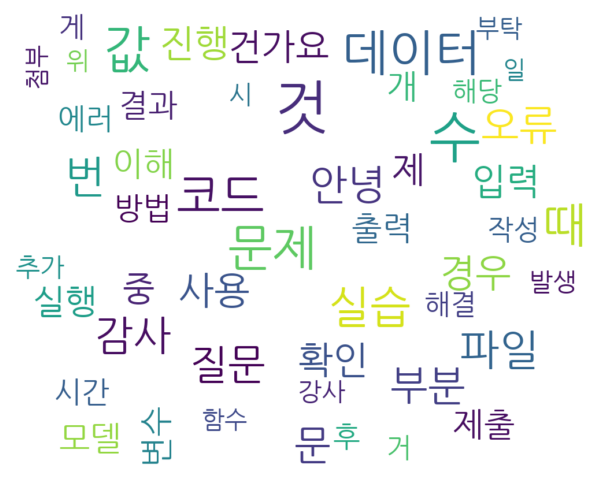

In [37]:
cloud = WordCloud(
        max_font_size=100,
        max_words=50,
        background_color='white', relative_scaling = .5,
        width=1000, height=800, font_path = FONT_PATH).generate_from_frequencies(nltk_nouns.vocab())
plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show

## 4. 문의 유형에 따른 분석
### 4-1. *3. 데이터 탐색*에서 실행한 알고리즘을 문의 유형에 따라 실행할 수 있는 함수를 개발합니다.
* 아래 text_analysis 함수를 개발합니다.

In [38]:
def text_analysis(df, label=None):
    """
    label에 따라서 분석, label이 None인 경우 전체 분석
    데이터 확인, 데이터 길이 시각화
    명사 추출하여 분석, 워드 클라우드 시각화

    Parameters
    ----------
    df : pandas DataFrame object.
    label : Label for analysis, default=None.
    - If label is None, Entire data are analyzed.

    Returns
    -------
    result : None

    """
    pass

    print("*"*120)
    if label is None:
        text_question = df['text'].reset_index(drop=True)
        display(df.label.value_counts())
        norm_label = df.label.value_counts(normalize=True)
        display(norm_label)
        norm_label.plot.bar(figsize=(5,5), color=sns.color_palette('Set2', n_colors=len(norm_label)))
        plt.show()
        df.info()
    else:
        text_question = df.loc[df_train['label']==label, 'text'].reset_index(drop=True)
        display(f"Type: {label}", text_question.head(10))


    # 데이터 확인
    display(text_question.describe(include='all'))

    text_length = text_question.apply(len)
    display(pd.DataFrame(text_length).describe().T)
    print("-"*120)
    print("최대 길이: ", text_question[text_length.argmax()])
    print("최소 길이: ", text_question[text_length.argmin()])

    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1, title="max string length: " + str(max(text_length)))
    sns.histplot(text_length, bins=50)
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x=text_length)
    plt.grid()
    plt.show()
    print("-"*120)

    nouns = text_question.apply(lambda t:mecab.nouns(str(t)))
    nouns = nltk.Text(nouns.explode())
    nouns = nltk.Text([w for w in nouns if isinstance(w, str)])

    # word cloud
    cloud = WordCloud(
        max_font_size=100,
        max_words=50,
        background_color='white', relative_scaling = .5,
        width=1000, height=800, font_path = FONT_PATH).generate_from_frequencies(nltk_nouns.vocab())
    plt.figure(figsize=(12,6))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show

    display(nouns.vocab().most_common(n=10))

### 4-2. 각각의 문의 유형에 대해 실행합니다.

************************************************************************************************************************


'Type: 시스템 운영'

0           한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
1    안녕하세요 \n\n코딩마스터스 재밌게 하고 있는 에이블러입니다.\n\n코딩마스터스가...
2    금요일에 홈페이지 점검이 있다는 내용을 들었었는데, 금일 접속해 보니 다른 곳은 다...
3    운영자 02님 혹시 원격 기다리실까봐 문의글 남깁니다.\n어차피 오전시간 얼마 안 ...
4    안녕하세요 DX7조입니다.\n제출 버튼에 ppt 파일을 먼저 제출하고 나서 발표영상...
5    안녕하세요!\n\n갑자기 셀프 테스트를 보는 도중 창이 다 꺼지고 홈으로 돌아갔는데...
6    AIDU 환경에서 한번 나오면 시험 끝이라는 강사님 말씀을 듣고 질문을 남깁니다.\...
7    최종개별실습 파일제출시에 제가 다른 경로로 저장한 빈파일을 올려서 \n소스코드가 하...
8    채점 했을때는 전부 pass로 뜨는데 제출하면 오답이라고 하는데 제출할 때 다른 케...
9    11월 10일 개인과제 제출 버튼을 누르면 아래와 같은 화면이 뜨면서 과제 제출이 ...
Name: text, dtype: object

count                                            561
unique                                           561
top       한달에 한번 지원금 들어오기로 했는데 국민 내일배움카드로 입금은 언제되나요?
freq                                               1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,561.0,89.613191,71.10484,10.0,46.0,71.0,113.0,650.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  안녕하십니까 다름아니라 8월 11일에 치룬 셀프테스트 결과를 확인하고 문의드릴점이 있어 글을 작성하게되었습니다 다름아니라 A-2번 문제는 실습A-2에서 실수값을 갖는 열의 개수를 구하는 문제입니다 저는 해당 문제를 풀기위해 info()함수를 제대로 이용하여 실수형 열의 개수를 구했습니다 저는 앞선 문제에서 mall 데이터에 열을 추가하는 문제를 먼저 푸는 바람에 A-2번 문제를 풀게되었을때 실수형태의 열 개수가 추가되어 기존의 실수형 형태의 열 개수가 2개에서 3개로 바뀌어 제 답안에는 실수형 열 개수가 3개라는 결과를 얻게되었습니다ㅠㅠ.. 이 경우에는 부분점수를 받거나 점수 변동이 가능할까요? 제 실습 파일을 보면 알 수 있듯이 사용해야하는 함수도 제대로 썼지만 앞서 열 추가 문제를 먼저 푸는 바람에 A-2번 문제를 풀때 열추가가된 것 같습니다.. 

추가로 95점 이상 남성을 구하는 문제에 있어 제가 등호표시를 &gt;로만 하여 아쉽게 오답으로 처리되었는데요.. 이 경우도 부분점수를 받을 수 있을까요?? 

그리고 이번 미니프로젝트 개별실습 채점방식은 앞서 오티때 말씀해주신것처럼 0~100점 형태의 점수표기가 아닌 NP/P 로 채점되는것인가요?? 

잘하고싶은 마음에 사소한것까지 하나하나 물어보게되었습니다 항상 성의껏 답변해주셔서 감사합니다!
최소 길이:  제출 오류가 뜹니다


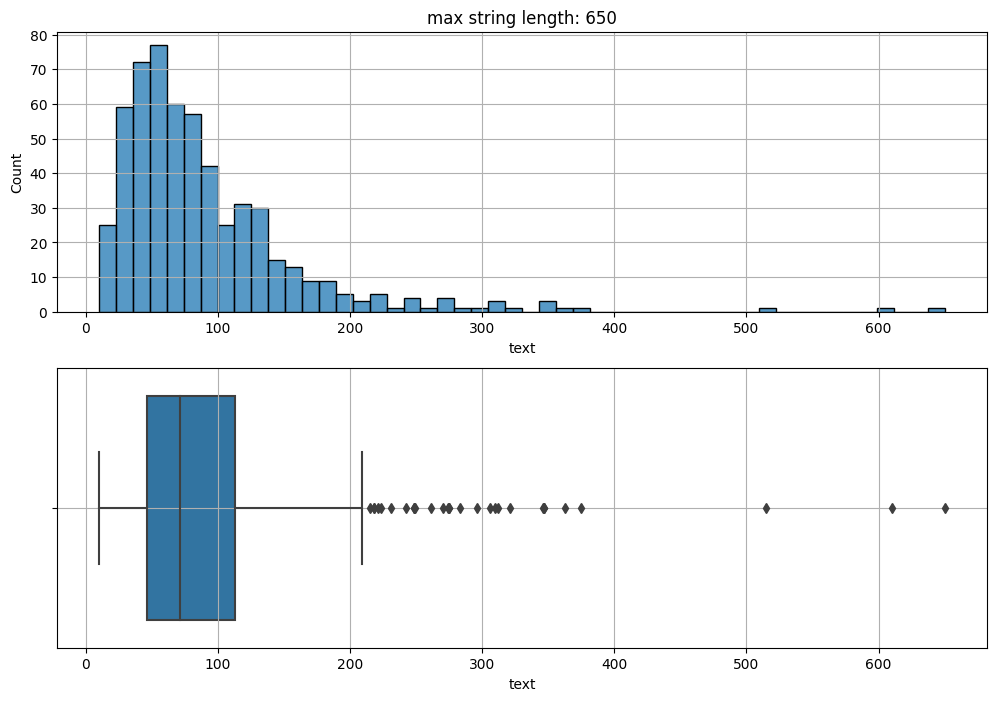

------------------------------------------------------------------------------------------------------------------------


[('제출', 316),
 ('파일', 224),
 ('수', 132),
 ('확인', 125),
 ('것', 124),
 ('안녕', 113),
 ('문제', 112),
 ('문', 103),
 ('강의', 103),
 ('실습', 97)]

************************************************************************************************************************


'Type: 원격'

0    말씀하신대로 하였으나, 이번에는 이런 오류가 발생합니다.\n\ncannot impo...
1                  어떻게 삭제하는지 모르겠어요 ㅜ 원격지원 부탁드려도 될까요.. 
2    마지막으로 안내해주신 명령어대로 수행해봤는데 역시 에러메시지가 뜹니다 ㅠㅠ\n혹시 ...
3    https://113366.com?accessCode=107144링크로 접속 후 프...
4    네트워크 오류 관련 알려주신 내용 확인해 봤는데 안됩니다,,,, 원격 부탁드려도 되...
5    튜터님,\n\n말씀해주신 urls.py 부분 해결하였습니다. 감사합니다.\n\n하지...
6                                   원격제어를 추가하는 것이 안됩니다
7                       1대1 원격조종으로 문제 해결 위해 남겨둔 질문입니다.
8    강사님께서 프로그램 다 종료하고 다시 가이드대로 해보라고 하셨는데도 계속 버츄얼 네...
9                        안녕하세요 깃허브 등록이안되서 원격제어 부탁드립니다.
Name: text, dtype: object

count                                                   100
unique                                                  100
top       말씀하신대로 하였으나, 이번에는 이런 오류가 발생합니다.\n\ncannot impo...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,100.0,84.02,86.997037,9.0,39.75,58.0,104.25,683.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  튜터님,

말씀해주신 urls.py 부분 해결하였습니다. 감사합니다.

하지만 아래 코드 실행시 또다른 에러가 발생합니다.
- C:\dev\mini_pro7&gt;python manage.py migrate
- C:\dev\mini_pro7&gt;python manage.py runserver

에러내용은 아래와 같습니다.
- OSError: [WinError 123] 파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못 
되었습니다: ''
- ModuleNotFoundError: No module named 'reference.urls'

문제 해결을 위해 https://bladewalker.tistory.com/713와 https://stackoverflow.com/questions/58873810/django-runserver-error-frozen-importlib-bootstrap를 참조하여
-  pip install --upgrade reference
- C:\dev\mini_pro7&gt;python manage.py makemigrations
코드를 실행하였으나 지속적으로 또다른 오류가 발생합니다.

---

다른 팀원분들께 여쭤보니 파이썬을 다시 삭제후 재설치를 권유하던데, 혹시 삭제후 재설치를 해야 할까요?
번거로우시겠지만, 원격으로 가상환경 세팅 도와주시면 정말 감사드리겠습니다.

최소 길이:  원격 부탁드립니다


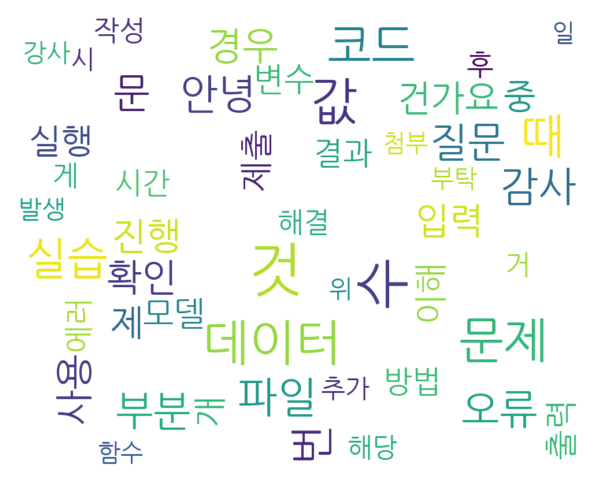

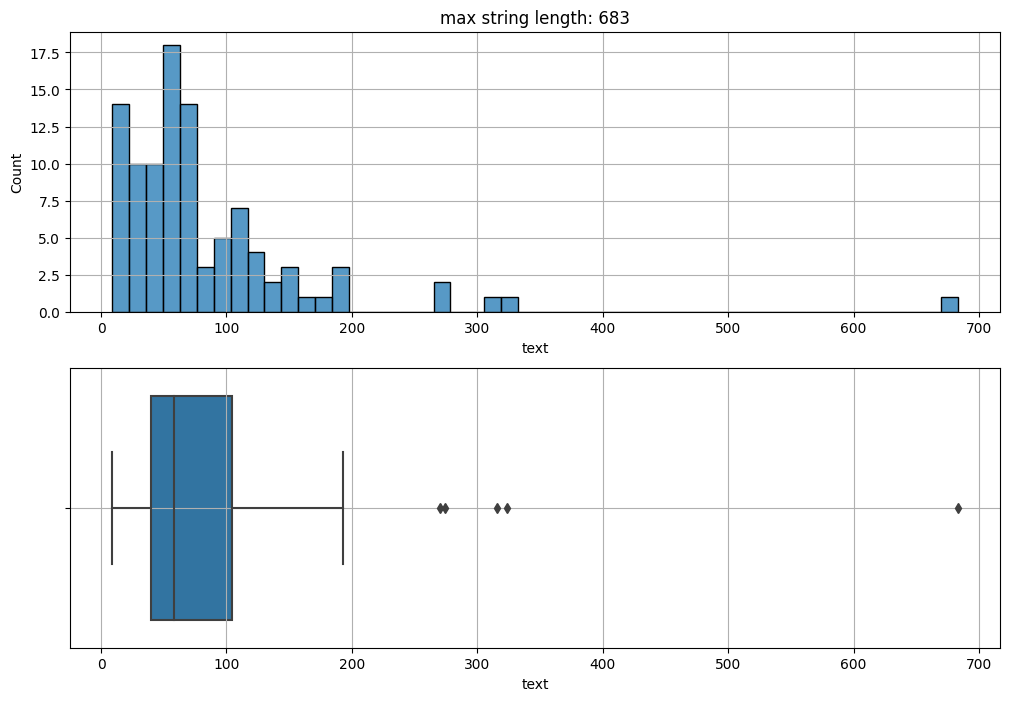

------------------------------------------------------------------------------------------------------------------------


[('원격', 98),
 ('지원', 51),
 ('부탁', 26),
 ('요청', 26),
 ('수', 23),
 ('오류', 19),
 ('실행', 17),
 ('해결', 15),
 ('감사', 15),
 ('안녕', 15)]

************************************************************************************************************************


'Type: 웹'

0    현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
1    PDF파일을 보시면 7페이지에 제안사 인프라는 3Tier로 구성(WEB/WAS/DB...
2    다시 쳐보기도 하면 오타 확인했지만 오타는 없었습니다. 그리고 해당 index파일도...
3    윈도우 프롬프트에서 작업중 cd Downloads 이후 퍼블릭 DNS를 연결하면 e...
4    아니면 혹시 인스턴스가 종료되었는데 삭제하기가 보이지가 않아서 새로운 인스턴스를 만...
5    두번째로 주신 OneDrive에 window10.ova파일이 아직 업로드 되지 않은...
6    google sheet의 제  master IP를 찾아 복사한 뒤 인스턴스 목록에서...
7    라우팅 테이블 설정에서 프라이빗서브넷이 퍼블릭 라우팅 테이블로 설정을 하였습니다.\...
8    강사님이 주신 참조자료 보면서 만들고 있습니다.\nhttps://findwork.d...
9    아까 rows에서 s빼먹어서 넣고 다시 돌려봤을때는 분명 열 저체가 다 나왔었거든요...
Name: text, dtype: object

count                                                   732
unique                                                  732
top       현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,732.0,184.84153,448.83214,13.0,60.0,101.0,172.0,5690.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  $ python manage.py createsuperuser

You have 18 unapplied migration(s). Your project may not work properly until you apply the migrations for app(s): admin, auth, contenttypes, sessions.
Run 'python manage.py migrate' to apply them.
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\django\db\backends\utils.py", line 84, in _execute
    return self.cursor.execute(sql, params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\django\db\backends\mysql\base.py", line 73, in execute
    return self.cursor.execute(query, args)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\MySQLdb\cursors.py", line 206, in execute
    res = self._query(query)
  File "C:\Users\User\AppData\Local\Programs\Python\Python39\lib\site-packages\MySQLdb\cursors.py", l

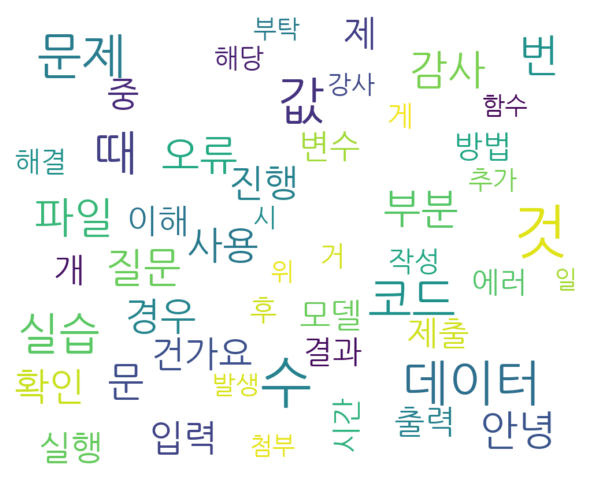

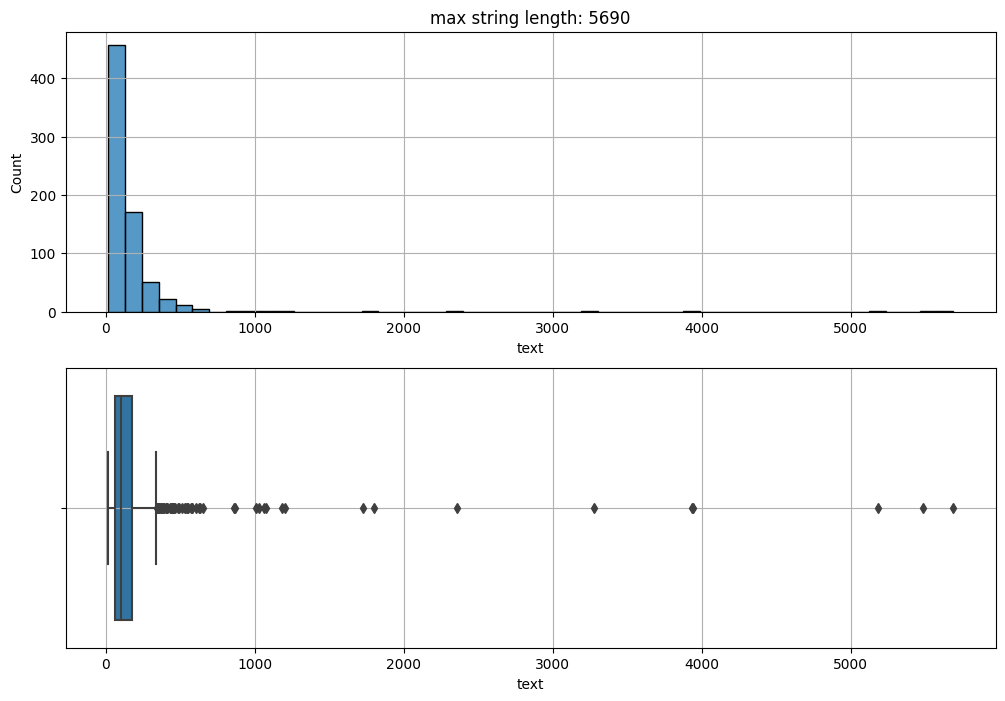

------------------------------------------------------------------------------------------------------------------------


[('실습', 159),
 ('오류', 146),
 ('수', 142),
 ('것', 137),
 ('파일', 123),
 ('실행', 123),
 ('진행', 109),
 ('부분', 108),
 ('때', 99),
 ('안녕', 99)]

************************************************************************************************************************


'Type: 이론'

0    저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
1    범주형 데이터와 숫자형 데이터 설명해주신 내용 잘 읽었습니다. 계속 읽고 적응해나아...
2    안녕하세요.\n\n실습1 제출합니다.\n피드백 부탁드립니다.\n\n+) 추가로, 저...
3    아이피 중에 13.13.12.2와 13.13.23.2가 없는데 어떤 것을 연결하는건...
4    backbone은 기본 골자이고, head는 backbone을 바탕으로 목적에 맞게...
5    3. IDF가 높다는 것은 적은 수의 문서에서 나타난다는 뜻이므로 그 단어가 그 문...
6    [실습4]\n\n쿠팡의 경우 유통업이지만 오픈마켓으로도 분류할 수가 있는데 제가 작...
7    도메인 관련 논문 검색 후 유의미한 feature 1차로 추려내서 데이터 전처리하는...
8    변수와 타겟간 가설수립을 할 때 변수간 관계를 이용해 변수를 추가해서 사용해도 될까...
9    이동인구 : 추정 합산값으로 소수점 표출, 개인정보 비식별화를 위해 3명 미만의 경...
Name: text, dtype: object

count                                                   728
unique                                                  728
top       저는 헬스케어, 그중에서도 정신건강에 대해 관심이 많습니다. 디지털 치료제와 관련한...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,728.0,138.668956,101.730658,13.0,71.0,110.0,178.25,915.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  수업에서 cacoo랑 packet tracer를 배우는 이유가

1. IT 인프라 구조에 대해서 이해해보는 시간
- 비록 직접 인프라를 구축 및 설계는 하지 않을지라도 어떻게 구성되어 있고 어떻게 돌아가는지는 알아보자.
적절한 비유일지는 모르겠으나, 운전을 하는 게 목표라고 할 때, 
우리가 자동차를 직접 설계하고 만들지는 않아도 자동차가 연료를 연소시키면서 엔진에 동력을 전달해서 그 힘으로 움직인다. 라는 식으로 원리와 과정을 아는 것과 같은 맥락...이려나요?

2. (DX과정이므로 DX 컨설턴트 및 관련 직무를 위한 교육이라고 가정할 때) DX 관련 업무에서 실제로 IT 인프라를 구축해야하는 경우가 있으며, 이 때 실제 장비를 가지고 하나씩 연결해보고 시도해보기에는 물리적(시간, 돈, 장소 등)제약이 있으므로 가상으로 해본다.

3. 적절한 비유일지는 모르겠으나...
수학에서 미적분을 배우는 게 최종 목표라고 했을 때, 처음부터 미적분을 학습시킬 수 없으니 그 기초가 되는 수열, 수열의 극한, 함수의 극한 순으로 배우듯이 DX 컨설턴트 과정에서 기초라 할 수 있는 IT 인프라를 학습하는 과정에 있는 것이다.

상기한 3가지 이유인가요?

이전까지 계속 코딩과 데이터 전처리 및 분석으로 달려오다가 갑자기 가상 세계 속에서 무언가를 구성해보기도 하고, 도식화 해보기도 하니 순간 이걸 배우는 목적이 무엇인가? 라고 했을 때 말문이 막혀서 한번 질문 드렸습니다.

훌륭한 커리큘럼을 구성한 교육과정에서 배우는 입장에서 이러한 의문을 가지는 게 터무니 없을 수도 있으나 목적의식과 목표에 대해서 알면 무엇을 좀 더 중점적으로 학습해야 할지 알 수 있을 거 같아서 문의드립니다. ^^:

추가적으로 혹시 실례가 안 된다면 실무에서 cacoo와 

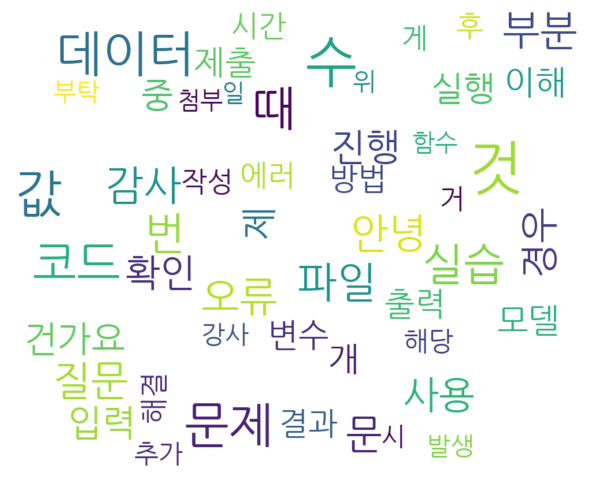

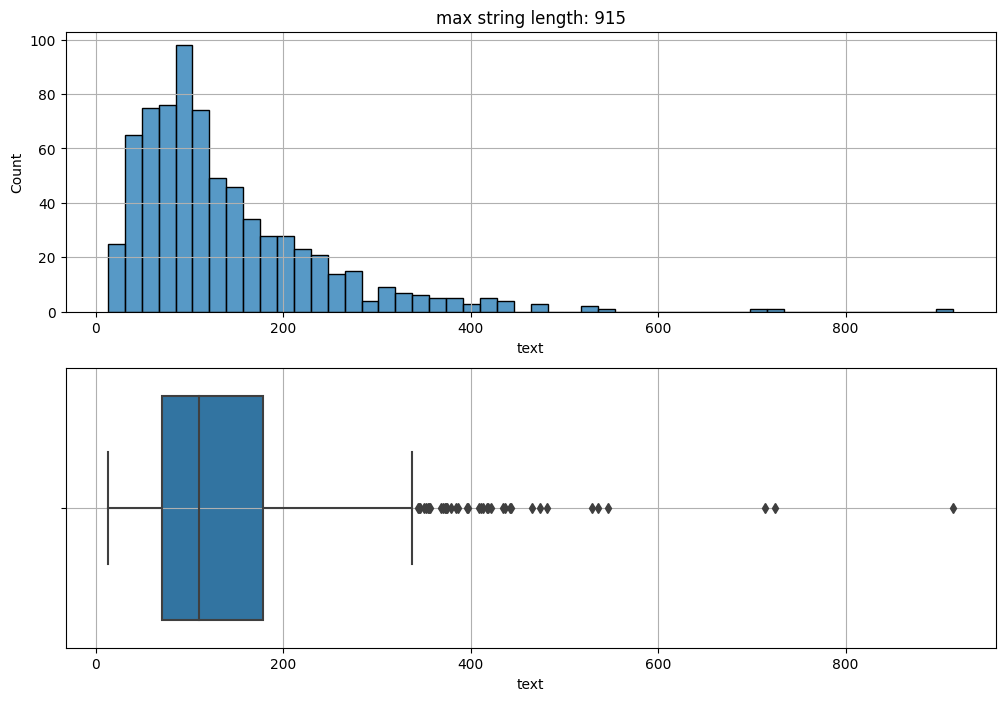

------------------------------------------------------------------------------------------------------------------------


[('것', 375),
 ('데이터', 276),
 ('때', 209),
 ('수', 199),
 ('값', 198),
 ('실습', 172),
 ('경우', 162),
 ('변수', 158),
 ('이해', 151),
 ('질문', 146)]

************************************************************************************************************************


'Type: 코드1'

0    첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
1    앗...제가 질문을 잘못드려서 혼란이 있으셨을 듯 합니다 죄송합니다...ㅠ\n원질문...
2    제가 All Failed를 말씀드린건.. 실행에는 아무문제가 없기 때문입니다...\...
3    안녕하세요! 3436번. 슬라이딩 퍼즐 문제 관련하여 질문드립니다.\n우선 3줄에 ...
4    안녕하세요, 답변에 감사드립니다. 3389 커트라인 정하기 추가 문의 드립니다. \...
5    52 54 55번은 모두 3360번 문제입니다..\n\n추가로 반복문 안에 조건문이...
6    안녕하세요 3417. 오리 농법 예제 입력 1의 예제 출력 1에 대해 질문 드립니다...
7    함수 say_hey를 만들어 보세요.\n횟수를 받는 입력 매개변수 count(숫자)...
8    w =int(input("수도사용량:"))\nb= input('회사명:')\ndef...
9    파이썬을 이번에 처음 배우게 되었습니다. 코딩마스터즈 테스트에서\n\nfrom sy...
Name: text, dtype: object

count                                                   488
unique                                                  488
top       첨부파일에 3375.번에 대해 정답인 코드로 돌렸을 시 다 패스가 출력되었지만 문제...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,488.0,333.356557,316.485935,12.0,124.0,242.5,414.0,2655.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  import collections
import re
a=list(input()) # 반복시킬 문자열 받기
b= input() # 목적
c=0 # 반복 횟수
y = [] # 반복할 문자열 갯수 
f = str(a[0]+'+'+a[1]+'+'+a[2]+'+') 

z = re.findall(f, b) 
z = list(str(z)) # z는 반복 대상 문자열
for i in z:
    if i in a:
        y.append(i)   # z중 '' ','등 불필요 문자 제거, 
        
if a[0]==a[1]==a[2]: # 반복시킬 문자열이 모두 같을 때
    d1=collections.Counter(a) # a 문자열 갯수
    d2=collections.Counter(y) # y 문자열 갯수
    while True:
        if d2-d1!=collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 적을 때
            a=a*2 # a문자열 반복
            c+=1 # 반복횟수 추가
            d1=collections.Counter(a) # 
            continue
        if d2-d1==collections.Counter(): # a의 모든 문자가 반복대상 문자보다 수가 크거나 같을 때
            print(c)
            break                   
        
elif (a[0]!=a[2]) & (a[0] == a[1]): # AAB와 같은 경우
    d1=collections.Counter(a)
    d2=collections.Counter(y)
    while 

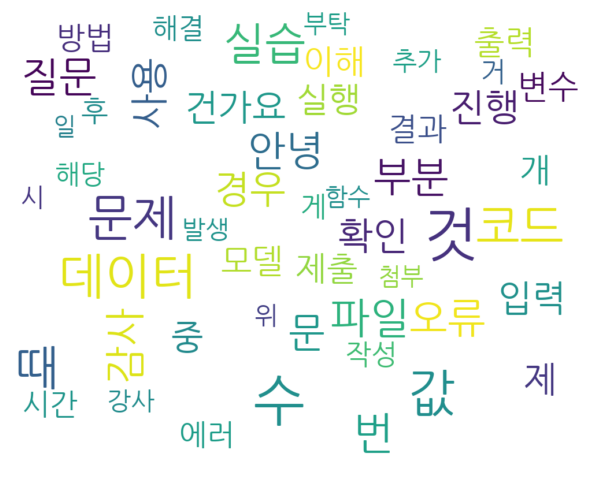

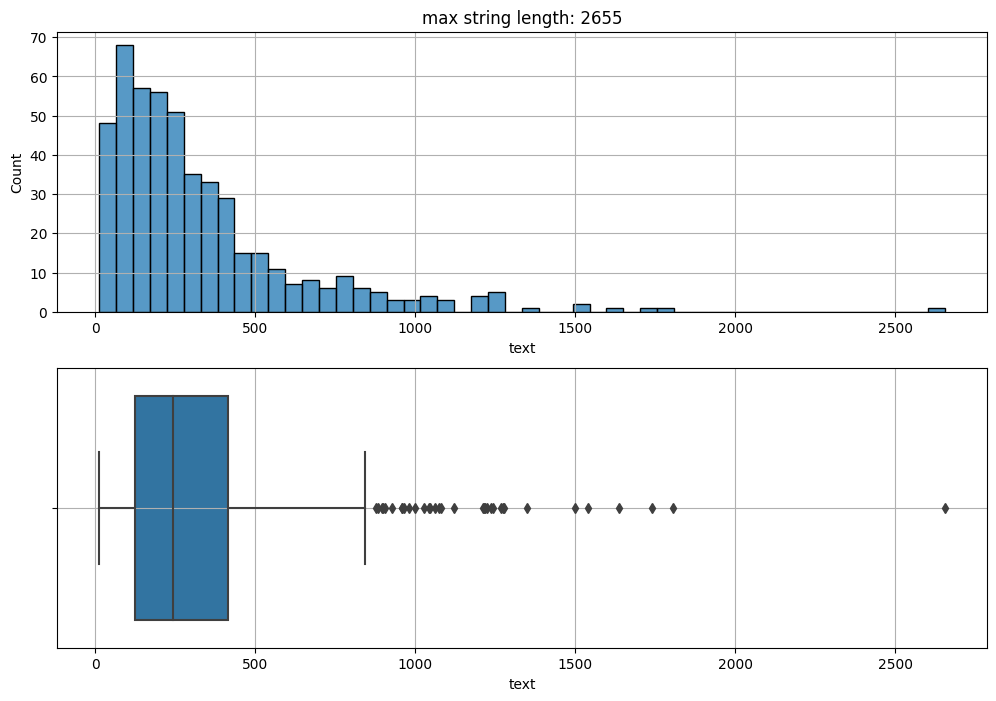

------------------------------------------------------------------------------------------------------------------------


[('문제', 266),
 ('값', 244),
 ('수', 239),
 ('입력', 237),
 ('출력', 216),
 ('코드', 203),
 ('번', 179),
 ('것', 166),
 ('때', 151),
 ('경우', 149)]

************************************************************************************************************************


'Type: 코드2'

0    self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
1    glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...
2    tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...
3    filename = TEST_IMAGE + str(round(frame_sec)) ...
4    만약\n각각 결측치가 하나씩 있는 경우를 제외하고\nOzone  열에도 Solar....
5    궁금한 사항은 다음과 같습니다.\n1) data에 있는 연속형 변수 A,B가 존재한...
6    model.predict() 에서 \n'float' object cannot be ...
7    x_train = scaler.fit_transform(x_train) \nx_va...
8    train_x,train_y= train_test_split(df_total,tes...
9    모델 학습 시 아래와 같은 error 메세지가 나와서 어떻게 해결해야 할지 문의 드...
Name: text, dtype: object

count                                                  1097
unique                                                 1097
top       self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,1097.0,261.750228,398.162267,13.0,90.0,158.0,285.0,6012.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs

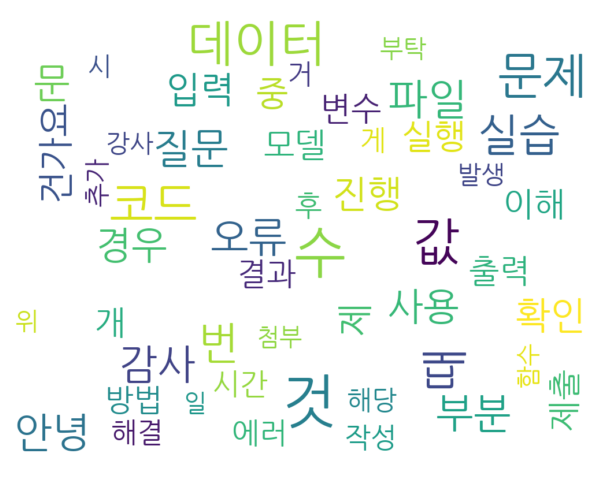

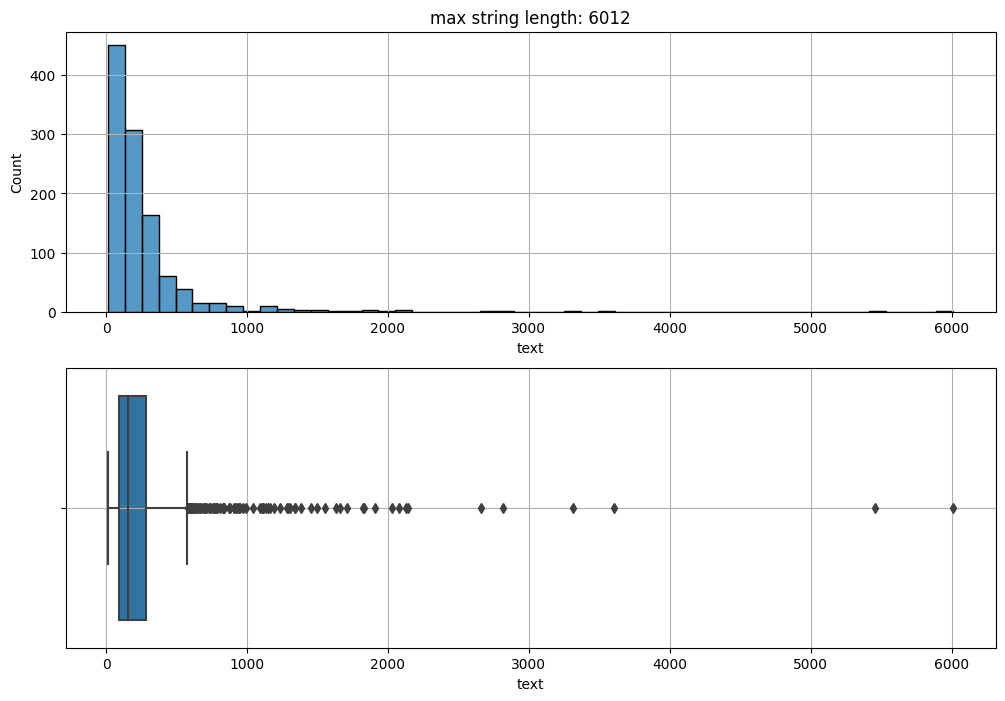

------------------------------------------------------------------------------------------------------------------------


[('데이터', 405),
 ('코드', 336),
 ('값', 303),
 ('것', 280),
 ('오류', 253),
 ('수', 251),
 ('때', 195),
 ('문제', 186),
 ('부분', 173),
 ('에러', 170)]

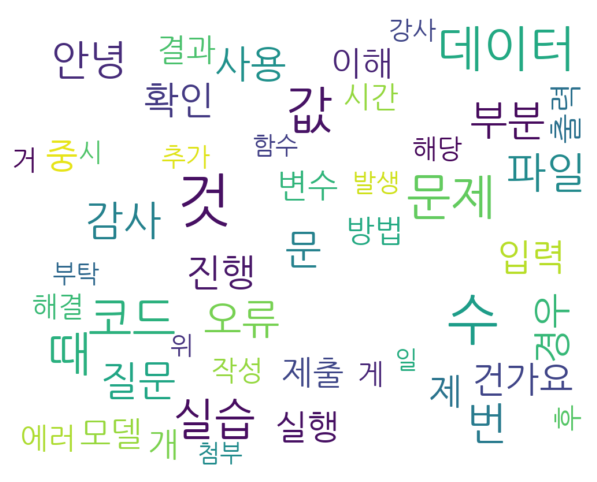

In [39]:
for label in sorted(df_train.label.unique()):
    if label is not None:
        text_analysis(df_train, label)

# 단계2 : 데이터 전처리
> * Tokenization(Konlpy...)
> * Vectorization(N-grams, Sequence)
> * [Google guide](https://developers.google.com/machine-learning/guides/text-classification/step-3)

## 5. 데이터 준비
### 5-1. label 아래 형식으로 처리
```python
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
```

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [41]:
label_dict = {
    '코드1': 0,
    '코드2': 0,
    '웹': 1,
    '이론': 2,
    '시스템 운영': 3,
    '원격': 4
}
preprocessed_df = df_train.replace({'label': label_dict}).copy()

************************************************************************************************************************


0    1585
1     732
2     728
3     561
4     100
Name: label, dtype: int64

0    0.427685
1    0.197518
2    0.196438
3    0.151376
4    0.026983
Name: label, dtype: float64

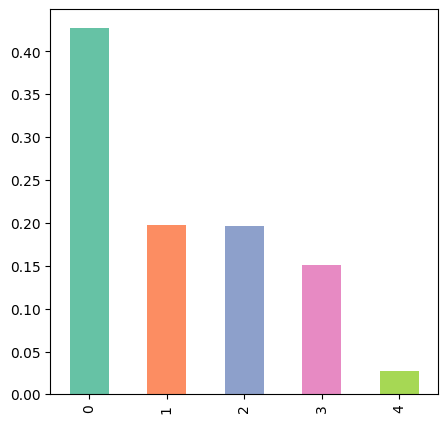

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3706 entries, 0 to 3705
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3706 non-null   object
 1   label   3706 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 58.0+ KB


count                                                  3706
unique                                                 3706
top       self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...
freq                                                      1
Name: text, dtype: object

,count,mean,std,min,25%,50%,75%,max
text,3706.0,200.957366,330.558868,9.0,68.0,118.0,222.0,6012.0


------------------------------------------------------------------------------------------------------------------------
최대 길이:  sns.kdeplot(x = td[var])
plt.show()

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
 in 
----&gt; 1 sns.kdeplot(x = td[var])
      2 plt.show()

~\anaconda3\lib\site-packages\seaborn\_decorators.py in inner_f(*args, **kwargs)
     44             )
     45         kwargs.update({k: arg for k, arg in zip(sig.parameters, args)})
---&gt; 46         return f(**kwargs)
     47     return inner_f
     48 

~\anaconda3\lib\site-packages\seaborn\distributions.py in kdeplot(x, y, shade, vertical, kernel, bw, gridsize, cut, clip, legend, cumulative, shade_lowest, cbar, cbar_ax, cbar_kws, ax, weights, hue, palette, hue_order, hue_norm, multiple, common_norm, common_grid, levels, thresh, bw_method, bw_adjust, log_scale, color, fill, data, data2, warn_singular, **kwargs

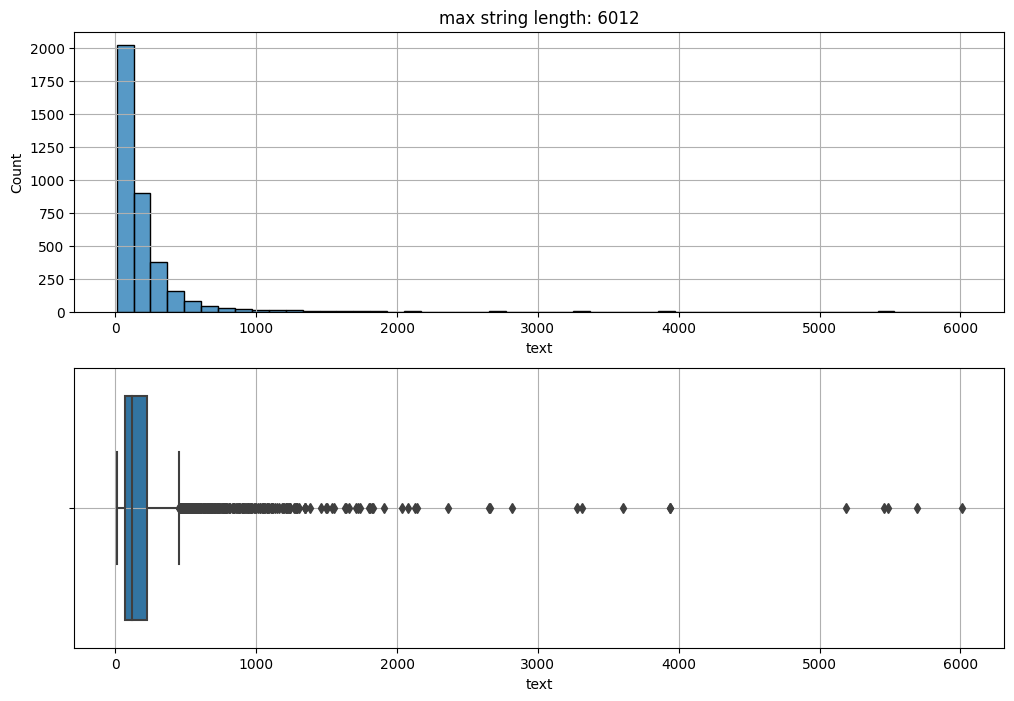

------------------------------------------------------------------------------------------------------------------------


[('것', 1093),
 ('수', 986),
 ('값', 801),
 ('데이터', 783),
 ('문제', 725),
 ('때', 714),
 ('코드', 712),
 ('실습', 609),
 ('번', 596),
 ('파일', 581)]

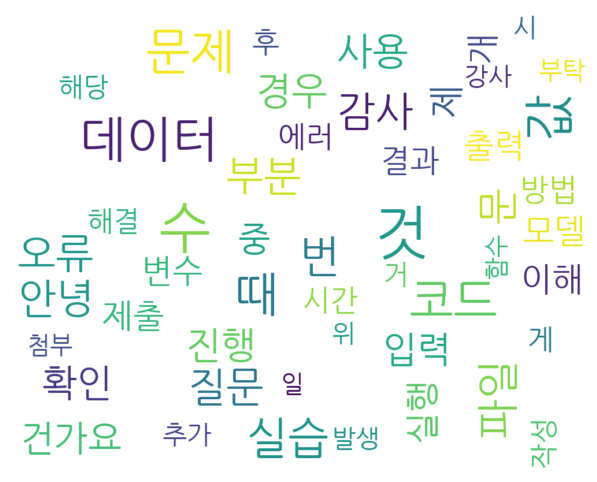

In [42]:
text_analysis(preprocessed_df)

### 5-2. Train Validation split

In [43]:
X_train, X_val, y_train, y_val = train_test_split(preprocessed_df.text, preprocessed_df.label, test_size = 0.3, random_state=40)

In [44]:
# 여기는 나중에

# import numpy as np
# X_test = pd.read_csv(os.path.join(PATH, 'test.csv'))['text']
# Y_test = pd.read_csv(os.path.join(PATH, 'test_label.csv'))['label']

In [45]:
# label_list = [label_dict[row['label']] for index, row in df_train.iterrows()]
# X_train, X_val = train_test_split(df_train, test_size=0.3, random_state=40)

## 6. 데이터 처리

### 6-1. 특수문자 제거(Optional)
- [정규표현식 이용](https://docs.python.org/3/howto/regex.html)

In [46]:
import re
import string

removal_list = "‘’◇‘”’'·\“·△●■()\">>`/-∼=ㆍ<>.?!【】…◆%"
removal_list += string.punctuation

def cleansing_special(sentence: str=None) -> str:
    sentence = re.sub("[^0-9a-zA-Zㄱ-ㅣ가-힣]", ' ', sentence)
    sentence = re.sub("\s+", " ", sentence)

    sentence = sentence.translate(str.maketrans(removal_list, ' '*len(removal_list)))
    sentence = sentence.strip()
    return sentence

In [47]:
for idx, row in preprocessed_df.iterrows():
    sent = row['text']
    if idx < 5:
        print(f"====={idx}=====")
        print(f"전처리 전: {sent}")
        print(f"전처리 후: {cleansing_special(sent)}")

=====0=====
전처리 전: self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, (K, 100)) for K in Ks])
1. 여기서 커널사이즈 K,100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다.
전처리 후: self convs1 nn ModuleList nn Conv2d 1 Co K 100 for K in Ks 1 여기서 커널사이즈 K 100 은 한 단어의 최대 길이가 100이 넘지않는다는 가정으로 그냥 100으로 선언한 것인지 궁금합니다
=====1=====
전처리 전: 현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요... 막혀서 뭘 할 수가 없네요.. 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다. 이유가 뭘까요
전처리 후: 현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데 클릭해도 생성이 안되네요 막혀서 뭘 할 수가 없네요 혹시나 해서 기본 예제코드로만 간단히 돌려도 안됩니다 이유가 뭘까요
=====2=====
전처리 전: glob.glob(PATH) 를 사용할 때 질문입니다.

PATH에 [ ] 가 포함되면 제대로 작동하지 않는 것 같아 질문 드립니다.

제공해주신 파일에 AIVLE_3rd[Team] 폴더가 포함되어 있는데, 이 폴더 안에는 glob이 정상적으로 작동하지 않습니다.
전처리 후: glob glob PATH 를 사용할 때 질문입니다 PATH에 가 포함되면 제대로 작동하지 않는 것 같아 질문 드립니다 제공해주신 파일에 AIVLE 3rd Team 폴더가 포함되어 있는데 이 폴더 안에는 glob이 정상적으로 작동하지 않습니다
=====3=====
전처리 전: tmpp = tmp.groupby(by = 'Addr1', as_index=False)[['Category']].sum()


plt.figure(figsize=(15, 5))
plt.bar(t

### 6-2. N-grams (sklearn)
> * [scikit-learn working with text data](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html#)
> * [scikit-learn text feature extraction](https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction)
> * [한글 자료](https://datascienceschool.net/03%20machine%20learning/03.01.03%20Scikit-Learn%EC%9D%98%20%EB%AC%B8%EC%84%9C%20%EC%A0%84%EC%B2%98%EB%A6%AC%20%EA%B8%B0%EB%8A%A5.html)

In [48]:
# from sklearn.feature_extraction.text import CountVectorizer
# corpus = text
# vect = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
# vect.fit(corpus)
# vect.vocabulary_

In [49]:
import nltk
nltk.download('punkt')

def generate_ngrams(text, n):
    # Tokenize the text into words
    words = nltk.word_tokenize(text)
    
    # Generate n-grams using the built-in function
    ngrams = nltk.ngrams(words, n)
    
    # Join the words in each n-gram and return as a list
    return [' '.join(gram) for gram in ngrams]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [50]:
ngrams = generate_ngrams(cleansing_special(sent), 2)
print(ngrams)

['상관관계는 그렇게', '그렇게 크지', '크지 않게', '않게 나오는데', '나오는데 p', 'p value', 'value 값은', '값은 관련이', '관련이 있게', '있게 나오는데', '나오는데 이', '이 경우', '경우 에는', '에는 어떻게', '어떻게 해석을', '해석을 해야하나요']


In [51]:
count_vectorizer = CountVectorizer()
count_mecab_vectorizer = CountVectorizer(tokenizer=mecab_tokenizer)

In [52]:
X_train_counts = count_vectorizer.fit_transform(X_train)
X_val_counts = count_vectorizer.transform(X_val)

In [53]:
X_train_mecab_counts = count_mecab_vectorizer.fit_transform(X_train)
X_val_mecab_counts = count_mecab_vectorizer.transform(X_val)

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [54]:
transformer = TfidfTransformer()
X_train_tfidf = transformer.fit_transform(X_train_mecab_counts)
X_val_tfidf = transformer.transform(X_val_mecab_counts)

In [55]:
tfidf_vectorizer = TfidfVectorizer(tokenizer=mecab_tokenizer)
X_train_tfidfv = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidfv = tfidf_vectorizer.transform(X_val)

In [56]:
print("Count Vectorizer Vocabulary size: ", len(count_vectorizer.vocabulary_))
print("Count Vectorizer(Mecab Tokenizer) Vocabulary size: ", len(count_mecab_vectorizer.vocabulary_))
print("TF-IDF Vectorizer(Mecab Tokenizer) Vocabulary size: ", len(tfidf_vectorizer.vocabulary_))

Count Vectorizer Vocabulary size:  22393
Count Vectorizer(Mecab Tokenizer) Vocabulary size:  9707
TF-IDF Vectorizer(Mecab Tokenizer) Vocabulary size:  9707


In [57]:
X_train_tfidf.toarray()[2,2]

0.0

In [58]:
X_train_tfidfv.toarray()[2,2]

0.0

In [59]:
X_train_tfidf.toarray()[2,2] == X_train_tfidfv.toarray()[2,2]

True

In [60]:
print(X_train_tfidf[0,2])

0.0


### 6-3. Sequence (keras, whatever)
> * [keras text classification](https://keras.io/examples/nlp/text_classification_from_scratch/)
> * [tensorflow text classification](https://www.tensorflow.org/tutorials/keras/text_classification)
* tokenizer.fit_on_texts() : 주어진 텍스트 데이터에 대해 단어 사전 생성
* 문장 길이 분포 살펴보기
* 문장 길이를 구해서 기초통계량, histogram, boxplot을 그려보고 적절한 개수를 결정합니다.
* tokenizer.texts_to_sequences() : 주어진 텍스트 데이터를 정수 시퀀스로 변환

In [61]:
%%time

import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing import text

TOP_K = 5000
MAX_SEQUENCE_LENGTH = 500
X_mor_train_str = X_train.apply(lambda x:' '.join(mecab_tokenizer(x)))
X_mor_val_str = X_val.apply(lambda x:' '.join(mecab_tokenizer(x)))
X_mor_train = X_train.apply(lambda x: mecab_tokenizer(x))
X_mor_val = X_val.apply(lambda x:mecab_tokenizer(x))

CPU times: user 18.7 s, sys: 533 ms, total: 19.3 s
Wall time: 17.6 s


,count,mean,std,min,25%,50%,75%,max
text,2594.0,80.081727,109.06344,3.0,30.0,52.0,92.0,1706.0


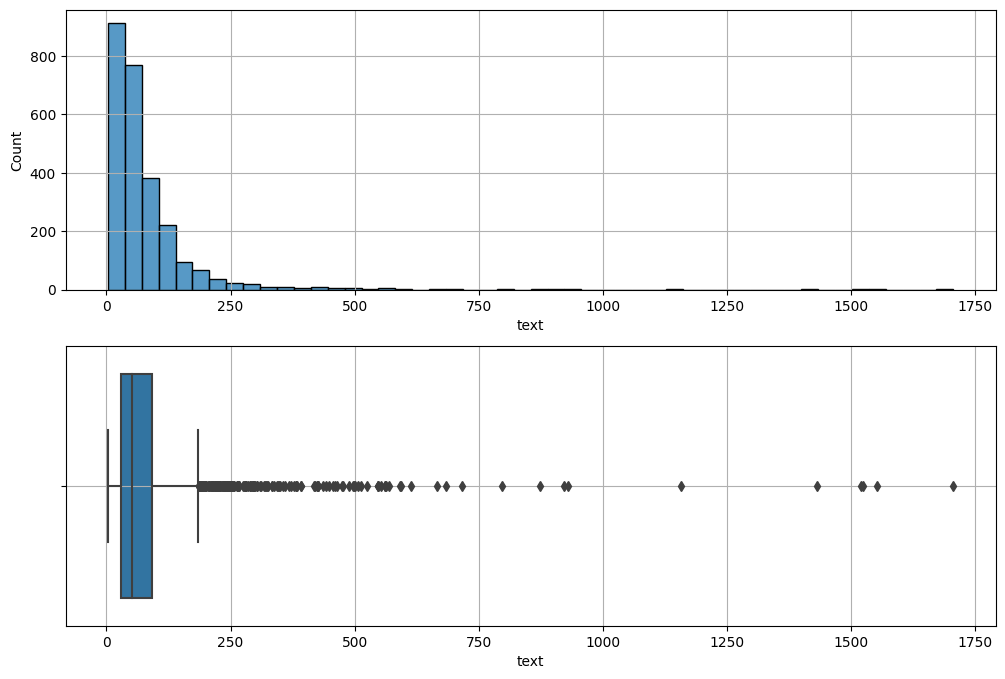

In [62]:
train_word_counts = X_mor_train.apply(lambda x:len(x))
display(pd.DataFrame(train_word_counts).describe().T)
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
sns.histplot(train_word_counts, bins=50)
plt.grid()
plt.subplot(2,1,2)
sns.boxplot(x=train_word_counts)
plt.grid()
plt.show()

In [63]:
tokenizer_str = text.Tokenizer(num_words=TOP_K, char_level=False)
tokenizer_str.fit_on_texts(X_mor_train_str)
X_mor_train_seq_str = tokenizer_str.texts_to_sequences(X_mor_train_str)
X_mor_val_seq_str = tokenizer_str.texts_to_sequences(X_mor_val_str)
max_length = len(max(X_mor_train_seq_str, key=len))
if max_length > MAX_SEQUENCE_LENGTH:
    max_length = MAX_SEQUENCE_LENGTH

print(max_length)
X_mor_train_seq_str = sequence.pad_sequences(X_mor_train_seq_str, maxlen=max_length)
X_mor_val_seq_str = sequence.pad_sequences(X_mor_val_seq_str, maxlen=max_length)

500


In [64]:
tokenizer = text.Tokenizer(num_words=TOP_K, char_level=False)
tokenizer.fit_on_texts(X_mor_train)
X_mor_train_seq = tokenizer.texts_to_sequences(X_mor_train)
X_mor_val_seq = tokenizer.texts_to_sequences(X_mor_val)

max_length = len(max(X_mor_train_seq, key=len))
if max_length > MAX_SEQUENCE_LENGTH:
    max_length = MAX_SEQUENCE_LENGTH

print(max_length)
X_mor_train_seq = sequence.pad_sequences(X_mor_train_seq, maxlen=max_length)
X_mor_val_seq = sequence.pad_sequences(X_mor_val_seq, maxlen=max_length)

500


In [65]:
import pickle
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
len(tokenizer.word_index)+1

9708

In [66]:
X_mor_train_str[2622]

'기존/NNG 에/JKB 있/VV 던/ETM 파일/NNG 을/JKO 삭제/NNG 해서/XSV+EC 윈도우/NNP 10/SN ./SF ova/SL 가져오/VV 기/ETN 가/JKS 안/MAG 되/VV 는데/EC 혹시/MAG 다시/MAG 파일/NNG 새로/MAG 주/VV 실/EP+ETM 수/NNB 있/VV 나요/EF ?/SF'

In [67]:
tokenizer_str.texts_to_sequences(X_mor_train_str[2622])

[[107],
 [],
 [],
 [112],
 [112],
 [446],
 [],
 [31],
 [],
 [278],
 [234],
 [92],
 [],
 [34],
 [],
 [369],
 [369],
 [],
 [241],
 [],
 [408],
 [325],
 [280],
 [],
 [1384],
 [199],
 [],
 [112],
 [112],
 [446],
 [],
 [27],
 [],
 [278],
 [234],
 [652],
 [],
 [],
 [124],
 [],
 [112],
 [112],
 [446],
 [],
 [76],
 [180],
 [],
 [59],
 [159],
 [369],
 [],
 [408],
 [123],
 [],
 [],
 [65],
 [],
 [],
 [112],
 [112],
 [268],
 [],
 [32],
 [46],
 [],
 [159],
 [112],
 [],
 [],
 [],
 [159],
 [227],
 [],
 [652],
 [369],
 [55],
 [],
 [159],
 [504],
 [],
 [26],
 [3436],
 [564],
 [],
 [369],
 [369],
 [],
 [107],
 [],
 [408],
 [325],
 [112],
 [],
 [26],
 [],
 [278],
 [234],
 [159],
 [],
 [75],
 [],
 [280],
 [55],
 [446],
 [],
 [45],
 [],
 [369],
 [369],
 [],
 [22],
 [312],
 [],
 [408],
 [123],
 [],
 [],
 [122],
 [],
 [280],
 [55],
 [446],
 [],
 [175],
 [122],
 [],
 [280],
 [55],
 [446],
 [],
 [1384],
 [199],
 [],
 [112],
 [112],
 [446],
 [],
 [1247],
 [50],
 [],
 [280],
 [55],
 [446],
 [],
 [74],
 [],
 [369

In [68]:
X_mor_train[2622]

['기존/NNG',
 '에/JKB',
 '있/VV',
 '던/ETM',
 '파일/NNG',
 '을/JKO',
 '삭제/NNG',
 '해서/XSV+EC',
 '윈도우/NNP',
 '10/SN',
 './SF',
 'ova/SL',
 '가져오/VV',
 '기/ETN',
 '가/JKS',
 '안/MAG',
 '되/VV',
 '는데/EC',
 '혹시/MAG',
 '다시/MAG',
 '파일/NNG',
 '새로/MAG',
 '주/VV',
 '실/EP+ETM',
 '수/NNB',
 '있/VV',
 '나요/EF',
 '?/SF']

### 6-4. Word2Vec (gensim, optional) 
> * [gensim-word2vec-tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py)
> * [tensorflow-word2vec-tutorial](https://www.tensorflow.org/tutorials/text/word2vec?hl=ko)

In [69]:
!pip install gensim==3.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.4/23.4 MB 32.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for gensim: filename=gensim-3.8.0-cp39-cp39-linux_x86_64.whl size=24952696 sha256=5a05050564665f92ee25153cd813cac4ed843757662ae1f87f8555dc2769545f
  Stored in directory: /root/.cache/pip/wheels/fb/18/fa/2a0084905c1be0cead09a515d05015c1f939afb16fd7893ff4
Successfully built gensim
  Attempting uninstall: gensim
    Found existing installation: gensim 4.3.1
    Uninstalling gensim-4.3.1:
      Successfully uninstalled gensim-4.3.1


In [70]:
import gensim
print(gensim.__version__)

3.8.0


In [71]:
PATH = '/content/drive/MyDrive/question/'

In [72]:
# 안 돼서 수동으로 압축 해제함 ㅡㅡ

import gdown
url = 'https://drive.google.com/file/d/0B0ZXk88koS2KbDhXdWg1Q2RydlU/view?resourcekey=0-Dq9yyzwZxAqT3J02qvnFwg'
output = os.path.join(PATH, 'ko.zip')
gdown.download(url, output, fuzzy=True, quiet=False)
import zipfile
with zipfile.ZipFile(os.path.join(PATH, "ko.zip"), 'r') as zip_ref:
    zip_ref.extractall(PATH)

Downloading...
From: https://drive.google.com/uc?id=0B0ZXk88koS2KbDhXdWg1Q2RydlU
To: /content/drive/MyDrive/question/ko.zip
100%|██████████| 80.6M/80.6M [00:00<00:00, 151MB/s]


In [73]:
from gensim.models import Word2Vec, FastText, KeyedVectors
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s: %(message)s', level=logging.INFO)
SIZE = 128 # embedding size
WINDOW = 3
MIN_COUNT = 1
w2v_model = Word2Vec(sentences=X_mor_train,
                     size=SIZE,
                     window=WINDOW,
                     max_vocab_size=None,
                     min_count=MIN_COUNT,
                     workers=4,
                     iter=10,
                     negative=5,
                     sg=0)

In [74]:
# 아래 함수는 제공합니다.
def get_sent_embeddings(model, embedding_size, tokenized_words):

    # 단어 임베딩 및 n_words의 크기가 0인 feature_vec 배열을 0으로 초기화합니다. 
    # 또한 model.wv.index2word를 사용하여 Word2Vec 모델의 어휘에 단어 세트를 생성합니다.
    feature_vec = np.zeros((embedding_size,), dtype='float32')
    n_words = 0
    index2word_set = set(model.wv.index2word)

    # 토큰화된 문장의 각 단어를 반복하고 Word2Vec 모델의 어휘에 존재하는지 확인합니다. 
    # 그렇다면 n_words가 증가하고 단어의 임베딩이 feature_vec에 추가됩니다.
    for word in tokenized_words:
        if word in index2word_set:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    
    # Word2Vec 모델의 어휘에 있는 입력 문장에 단어가 있는지 확인합니다. 
    # 있다면 feature_vec를 n_words로 나누어 입력 문장의 평균 임베딩을 구합니다.
    if (n_words > 0):
        feature_vec = np.divide(feature_vec, n_words)
        
    return feature_vec
def get_dataset(sentences, model, num_features):

    # 각 문장에 대한 임베딩을 보유할 dataset이라는 빈 목록을 초기화합니다.
    dataset = list()

    # 문장의 각 문장을 반복하고 앞에서 설명한 get_sent_embeddings() 함수를 사용하여 문장에 대한 평균 임베딩을 생성합니다. 
    # 결과 문장 임베딩이 데이터 세트 목록에 추가됩니다.
    for sent in sentences:
        dataset.append(get_sent_embeddings(model, num_features, sent))

    # 루프에서 생성된 문장 임베딩을 sent_embedding_vectors라는 2차원 배열에 쌓습니다. 
    sent_embedding_vectors = np.stack(dataset)
    
    return sent_embedding_vectors

In [75]:
pre_trained = Word2Vec.load(os.path.join(PATH, "ko.bin"))

In [76]:
len(w2v_model.wv.index2word)

10305

In [77]:
for index, word in enumerate(w2v_model.wv.index2word):
    if index ==10:
        break
    print(f"word #{index}/{len(w2v_model.wv.index2word)} is {word}")

for index, word in enumerate(pre_trained.wv.index2word):
    if index == 10:
        break
    print(f"word #{index}/{len(pre_trained.wv.index2word)} is {word}")

word #0/10305 is ,/SC
word #1/10305 is (/SSO
word #2/10305 is -/SY
word #3/10305 is _/SY
word #4/10305 is )/SSC
word #5/10305 is ./SF
word #6/10305 is ./SY
word #7/10305 is =/SY
word #8/10305 is 하/XSV
word #9/10305 is 가/JKS
word #0/30185 is 하
word #1/30185 is 이
word #2/30185 is ㄴ
word #3/30185 is 의
word #4/30185 is 는
word #5/30185 is 다
word #6/30185 is 에
word #7/30185 is 을
word #8/30185 is 었
word #9/30185 is 은


In [78]:
w2v_model.wv['문제/NNG']

array([-1.04114175e+00, -1.30861688e+00,  1.38184547e+00,  6.83730170e-02,
        1.62666452e+00, -1.21274900e+00,  1.75772280e-01,  6.60245478e-01,
        1.35070622e-01, -4.60437775e-01, -8.82263899e-01,  1.38371885e-01,
       -4.98179853e-01,  1.04171515e-01, -6.70359790e-01, -1.25416946e+00,
       -2.72973478e-01,  5.10231614e-01, -8.26505721e-02,  1.49474114e-01,
       -5.01117408e-01,  8.85950267e-01, -8.37624013e-01, -1.58343697e+00,
       -4.99545902e-01,  1.25677693e+00,  4.45554495e-01,  2.17950612e-01,
       -3.80266100e-01,  4.35580105e-01,  8.62973571e-01, -4.96889472e-01,
        2.35675737e-01,  8.86443019e-01, -1.12877488e+00, -4.53381300e-01,
       -1.10945606e+00,  6.35940373e-01,  3.78143281e-01, -2.98077583e-01,
        2.75836527e-01, -8.65727067e-01, -5.11172116e-01,  6.74020171e-01,
        6.18606329e-01, -2.67137885e-01, -3.79121751e-01,  8.92182291e-02,
        3.90006334e-01, -3.50640625e-01,  7.71307349e-01, -1.29251611e+00,
       -3.13836157e-01,  

In [79]:
from konlpy.utils import pprint

pprint(w2v_model.wv.similar_by_word("문제/NNG"))
pprint(pre_trained.wv.similar_by_word("문제"))

[('부분/NNG', 0.8444341421127319),
 ('상황/NNG', 0.8151094913482666),
 ('상태/NNG', 0.8027163743972778),
 ('어디/NP', 0.7987180948257446),
 ('제/NP', 0.7857433557510376),
 ('심야버스/NNP', 0.785552978515625),
 ('본/NNG', 0.7798364758491516),
 ('이/NP', 0.7756484746932983),
 ('커서/NNG', 0.7747945785522461),
 ('경향/NNG', 0.7618439793586731)]
[('문제점', 0.6326159238815308),
 ('과제', 0.6073911190032959),
 ('이슈', 0.5782127380371094),
 ('오류', 0.5711268186569214),
 ('논의', 0.5632050037384033),
 ('난제', 0.5623012781143188),
 ('격차', 0.5500482320785522),
 ('폐해', 0.546886146068573),
 ('쟁점', 0.5369225740432739),
 ('논란', 0.5352994203567505)]


In [80]:
X_pr_train = get_dataset(X_train.apply(lambda x: mecab.morphs(x)), pre_trained, 200)
X_pr_val = get_dataset(X_val.apply(lambda x: mecab.morphs(x)), pre_trained, 200)

In [81]:
print(X_pr_train.shape)

(2594, 200)


In [82]:
X_pr_train

array([[ 0.31590134, -0.32537133, -0.7203466 , ...,  0.5739513 ,
        -0.4016488 , -0.12247835],
       [-0.03829222,  0.65330553, -0.24798286, ...,  0.44637606,
         0.05009526,  0.13264766],
       [ 0.13402383,  0.20593716, -0.2238828 , ...,  0.9318299 ,
        -0.00994976, -0.05068248],
       ...,
       [ 0.11617593,  0.23921092, -0.8226077 , ...,  0.08719417,
        -0.19894451, -0.07889563],
       [-0.03684868, -0.01131414, -0.04355419, ...,  0.7841752 ,
        -0.14284861, -0.25371662],
       [ 0.30445954, -0.04583384, -0.20980749, ...,  0.4586243 ,
        -0.35916278, -0.51268154]], dtype=float32)

In [ ]:
np.save("/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/1on1question_label/X_pr_train", arr=X_pr_train)
np.save("/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/1on1question_label/X_pr_val", arr=X_pr_val)

### 6-5. 데이터 저장하기
* N-gram, Sequence로 처리한 데이터 저장
* sparse data에 대해서는 scipy.sparse.save_npz 활용

In [ ]:
import numpy as np
import scipy.sparse

scipy.sparse.save_npz("/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/1on1question_label/X_tfidf_train", X_train_tfidf)
scipy.sparse.save_npz("/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/1on1question_label/X_tfidf_val", X_val_tfidf)
# scipy.sparse.save_npz("X_tfidf_train", X_train_tfidf)

In [ ]:
np.save("/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/1on1question_label/X_mor_sequence_train", arr = X_mor_train_seq)
np.save("/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/1on1question_label/X_mor_sequence_val", arr = X_mor_val_seq)
#np.save("X_mor_sequence_train", arr = X_mor_train_seq)

In [ ]:
# np.save("y_train", arr=Y_train)
# np.save("y_val", arr=Y_val)

In [84]:
preprocessed_df

,text,label
0,"self.convs1 = nn.ModuleList([nn.Conv2d(1, Co, ...",0
1,현재 이미지를 여러개 업로드 하기 위해 자바스크립트로 동적으로 폼 여러개 생성하는데...,1
2,glob.glob(PATH) 를 사용할 때 질문입니다.\n\nPATH에 [ ] 가 ...,0
3,"tmpp = tmp.groupby(by = 'Addr1', as_index=Fals...",0
4,filename = TEST_IMAGE + str(round(frame_sec)) ...,0
...,...,...
3701,"토큰화 이후 train val 를 분리하고 각 train set, val set에 ...",0
3702,올린 값들 중 최고점인 건가요? 아니면 최근에 올린 파일로 무조건 갱신인가요?\n최...,3
3703,수업에서 cacoo랑 packet tracer를 배우는 이유가\n\n1. IT 인프...,2
3704,inplace =True 해도 값이 변경이 안되고 none으로 뜹니다. 혹시 원격지...,4


In [85]:
y_train

1939    1
212     1
3441    2
867     1
202     1
       ..
3064    3
2213    1
2055    1
2267    2
3398    0
Name: label, Length: 2594, dtype: int64

In [86]:
y_val

215     0
1881    2
497     2
1447    2
3693    0
       ..
712     0
525     1
1581    1
564     3
3248    0
Name: label, Length: 1112, dtype: int64

In [88]:
import pandas as pd

# y_train을 csv 파일로 저장
y_train.to_csv('/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/1on1question_label/y_train.csv', index=False)

# y_val을 csv 파일로 저장
y_val.to_csv('/content/drive/MyDrive/KT aivleschool/KT_aivle_school_AI_track/14. MINI_PJ4/1on1question_label/y_val.csv', index=False)